In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("co2.csv")
df.dtypes

time     object
co2     float64
dtype: object

In [23]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

time    datetime64[ns]
co2            float64
dtype: object

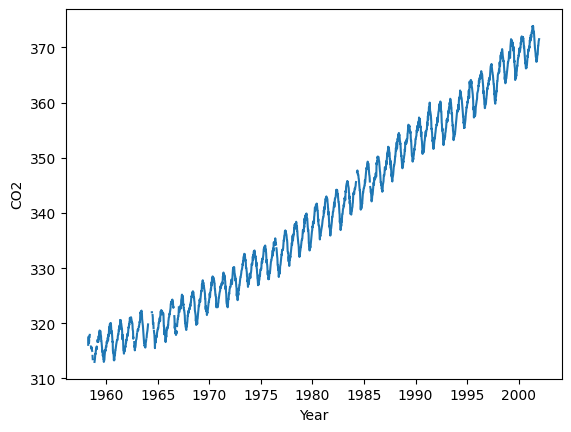

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['time'], df['co2'])
ax.set_xlabel("Year")
ax.set_ylabel("CO2")
plt.show()

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2284 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB
None


 Với bài toán time series thì ko đc drop null vì như thế sẽ bị ngắt quãng data -> xử lí bằng interpolation

In [26]:
df['co2'] = df['co2'].interpolate() #Xử lí null roài thích thì in ra 

In [27]:
def create_ts_data(df, window_size = 5 ):
    for i in range(1,window_size):
        df[f'co2_{i}'] = df['co2'].shift(-i)
    df['target'] = df['co2'].shift(-i)
    df = df.dropna(axis = 0)
    return df


In [28]:
df = create_ts_data(df)
print(df)

           time    co2  co2_1  co2_2  co2_3  co2_4  target
0    1958-03-29  316.1  317.3  317.6  317.5  316.4   316.4
1    1958-04-05  317.3  317.6  317.5  316.4  316.9   316.9
2    1958-04-12  317.6  317.5  316.4  316.9  317.2   317.2
3    1958-04-19  317.5  316.4  316.9  317.2  317.5   317.5
4    1958-04-26  316.4  316.9  317.2  317.5  317.9   317.9
...         ...    ...    ...    ...    ...    ...     ...
2275 2001-11-03  368.7  368.8  369.7  370.3  370.3   370.3
2276 2001-11-10  368.8  369.7  370.3  370.3  370.8   370.8
2277 2001-11-17  369.7  370.3  370.3  370.8  371.2   371.2
2278 2001-11-24  370.3  370.3  370.8  371.2  371.3   371.3
2279 2001-12-01  370.3  370.8  371.2  371.3  371.5   371.5

[2280 rows x 7 columns]


In [29]:
x = df.drop(['time', 'target'], axis = 1)
y = df['target']

In [30]:
len(x)

2280

Không dùng được train_test_split vì như thế data sẽ bị ngắt quãng

In [31]:
train_ratio = 0.8
num_samples = len(x)

x_train = x[:int(num_samples*train_ratio)]
y_train = y[:int(num_samples*train_ratio)]
x_test =x[int(num_samples*train_ratio):]
y_test = y[int(num_samples*train_ratio):]

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

reg = Pipeline(steps= [
    # ('scaler', StandardScaler()), # Cùng scale rồi nên là không cần standard scaler
    ('model', LinearRegression())
])
reg.fit(x_train, y_train)

Pipeline(steps=[('model', LinearRegression())])

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_predict = reg.predict(x_test)

In [34]:
print(f'R2: {r2_score(y_test, y_predict)}')
 

R2: 1.0


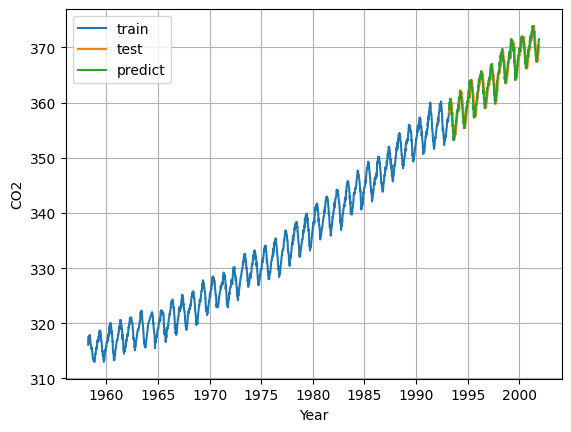

In [35]:
fig, ax = plt.subplots()
ax.plot(df['time'][:int(num_samples*train_ratio)], df['co2'][:int(num_samples*train_ratio)], label = "train") #Train
ax.plot(df['time'][int(num_samples*train_ratio):], df['co2'][int(num_samples*train_ratio):], label = 'test') #Test
ax.plot(df['time'][int(num_samples*train_ratio):], y_predict, label = 'predict') #Predict
ax.set_xlabel("Year")
ax.set_ylabel("CO2")
ax.legend() ##để có tên
ax.grid()
plt.show()

Random Forest chỉ dự đoán được các giá trị nằm đã từng nhìn thấy ( ở bộ train) nên khi nó sẽ xuất hiện 1 đường thẳng 

In [40]:
current_data = [380.5 , 390,  390.2 , 390.4, 393]
for i in range(10):
    print("Input is {}".format(current_data))
    prediction = reg.predict([current_data])[0]
    print("CO2 in week {} is {}".format(i+1, prediction))
    current_data = current_data[1:] + [prediction]
    print("_______________________")

Input is [380.5, 390, 390.2, 390.4, 393]
CO2 in week 1 is 393.0
_______________________
Input is [390, 390.2, 390.4, 393, 393.0]
CO2 in week 2 is 392.99999999999994
_______________________
Input is [390.2, 390.4, 393, 393.0, 392.99999999999994]
CO2 in week 3 is 392.9999999999999
_______________________
Input is [390.4, 393, 393.0, 392.99999999999994, 392.9999999999999]
CO2 in week 4 is 392.99999999999983
_______________________
Input is [393, 393.0, 392.99999999999994, 392.9999999999999, 392.99999999999983]
CO2 in week 5 is 392.9999999999998
_______________________
Input is [393.0, 392.99999999999994, 392.9999999999999, 392.99999999999983, 392.9999999999998]
CO2 in week 6 is 392.9999999999997
_______________________
Input is [392.99999999999994, 392.9999999999999, 392.99999999999983, 392.9999999999998, 392.9999999999997]
CO2 in week 7 is 392.99999999999966
_______________________
Input is [392.9999999999999, 392.99999999999983, 392.9999999999998, 392.9999999999997, 392.99999999999966]


c:\Users\ORLab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ORLab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ORLab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ORLab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ORLab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Line